## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [16]:
import pandas as pd

# Load the dataset
file_path = './data/car_data.csv'
data = pd.read_csv(file_path)

# Display the head and dimensions of the data
data_head = data.head()
data_dimensions = data.shape

data_head, data_dimensions

(   User ID Gender  Age  AnnualSalary  Purchased
 0      385   Male   35         20000          0
 1      681   Male   40         43500          0
 2      353   Male   49         74000          0
 3      895   Male   40        107500          1
 4      661   Male   25         79000          0,
 (1000, 5))

The dataset has 1000 observations with no missing values.
It includes variables such as User ID, Gender, Age, AnnualSalary, and Purchased.
The Gender variable has been successfully converted into a dummy variable, where 0 represents male and 1 represents female.

In [17]:

summary = data.describe(include='all')
missing_values = data.isnull().sum()
# converting into numerical (not a fan of this but idk how else to do it)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Create  matrix X of predictors including Age and AnnualSalary, and an outcome ..Purchase
X = data[['Age', 'AnnualSalary']]
y = data['Purchased']

summary, missing_values, X.head(), y.head()

(            User ID  Gender          Age   AnnualSalary    Purchased
 count   1000.000000    1000  1000.000000    1000.000000  1000.000000
 unique          NaN       2          NaN            NaN          NaN
 top             NaN  Female          NaN            NaN          NaN
 freq            NaN     516          NaN            NaN          NaN
 mean     500.500000     NaN    40.106000   72689.000000     0.402000
 std      288.819436     NaN    10.707073   34488.341867     0.490547
 min        1.000000     NaN    18.000000   15000.000000     0.000000
 25%      250.750000     NaN    32.000000   46375.000000     0.000000
 50%      500.500000     NaN    40.000000   72000.000000     0.000000
 75%      750.250000     NaN    48.000000   90000.000000     1.000000
 max     1000.000000     NaN    63.000000  152500.000000     1.000000,
 User ID         0
 Gender          0
 Age             0
 AnnualSalary    0
 Purchased       0
 dtype: int64,
    Age  AnnualSalary
 0   35         20000
 1   

In [18]:
#%pip install scikit-learn

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# MaxMin-normalize Age and AnnualSalary in X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split sample into a 80% training dataset and a 20% testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train[:5], y_train.head(), X_test[:5], y_test.head()

(array([[0.44444444, 0.96363636],
        [0.91111111, 0.06909091],
        [0.37777778, 0.55272727],
        [0.55555556, 0.44727273],
        [0.28888889, 0.74909091]]),
 29     1
 535    1
 695    1
 557    0
 836    1
 Name: Purchased, dtype: int64,
 array([[0.51111111, 0.42545455],
        [0.91111111, 0.87636364],
        [0.15555556, 0.32363636],
        [0.64444444, 0.2       ],
        [0.62222222, 0.87636364]]),
 521    0
 737    1
 740    0
 660    1
 411    0
 Name: Purchased, dtype: int64)

The features Age and AnnualSalary in the matrix X have been successfully MaxMin-normalized. The dataset has also been split into training and testing datasets, with approximately 80% of the data used for training and 20% for testing.

I will treat this as a classification problem and use sklearn to determine the optimal number of neighbors k to use. This will be followed by running the model on the testing data and evaluating its performance through a confusion matrix. Additionally, I will compute separate confusion matrices for men and women to analyze gender-specific accuracy.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Use sklearn to determine the optimal number of neighbors k to use
param_grid = {'n_neighbors': range(1, 50)}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Optimal number of neighbors
optimal_k = grid_search.best_params_['n_neighbors']
optimal_k, grid_search.best_score_

(5, 0.9125)

The optimal number of neighbors 

k for the k-nearest neighbor algorithm, determined through grid search with 5-fold cross-validation, is found to be 5. The model achieved a cross-validation score of 91.25%.

In [21]:
from sklearn.metrics import confusion_matrix

# run model for optimal number of neighbors on the testing data
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

# Compute the confmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[106,   6],
       [ 12,  76]])

The model correctly predicted 'No Purchase' 106 times and incorrectly predicted 'No Purchase' 6 times (i.e., it predicted a sale when one failed to occur).
The model correctly predicted 'Purchase' 76 times and incorrectly predicted 'Purchase' 12 times (i.e., it predicted no sale when one did occur).
Overall, the model shows a high accuracy in its predictions, with a higher number of true positives (correct predictions of sales) and true negatives (correct predictions of no sales).

In [22]:
# Compute confusion matrices separately for men and women
data['Gender'] = data['Gender'].map({0: 'Male', 1: 'Female'})  # Remapping for clarity in the following steps

# Split the data by gender (again not a fan)
data_male = data[data['Gender'] == 'Male']
data_female = data[data['Gender'] == 'Female']

# Male data
X_male = scaler.transform(data_male[['Age', 'AnnualSalary']])
y_male = data_male['Purchased']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
knn_optimal.fit(X_train_male, y_train_male)
y_pred_male = knn_optimal.predict(X_test_male)
conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)

# Female data
X_female = scaler.transform(data_female[['Age', 'AnnualSalary']])
y_female = data_female['Purchased']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)
knn_optimal.fit(X_train_female, y_train_female)
y_pred_female = knn_optimal.predict(X_test_female)
conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)

conf_matrix_male, conf_matrix_female


(array([[57,  1],
        [ 8, 31]]),
 array([[53,  6],
        [ 4, 41]]))

For men, the model accurately predicted 'No Purchase' 57 times and 'Purchase' 31 times. It incorrectly predicted 'No Purchase' once and 'Purchase' 8 times.
For women, the model accurately predicted 'No Purchase' 53 times and 'Purchase' 41 times. It incorrectly predicted 'No Purchase' 6 times and 'Purchase' 4 times.
The model tends to be more accurate for women, with a lower number of false positives (incorrect predictions of purchase) and false negatives (incorrect predictions of no purchase) compared to men. This suggests that the model's performance varies between genders, being slightly more effective at predicting the purchasing behavior of women than men. This kind of analysis is crucial in understanding and improving the performance of machine learning algorithms across different demographic groups.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [23]:
import pandas as pd

# Load the dataset
file_path = './data/USA_cars_datasets.csv'
data = pd.read_csv(file_path)

data = data[['price', 'year', 'mileage']]
na_check = data.isna().sum()

data.head(), data.shape, na_check

(   price  year  mileage
 0   6300  2008   274117
 1   2899  2011   190552
 2   5350  2018    39590
 3  25000  2014    64146
 4  27700  2018     6654,
 (2499, 3),
 price      0
 year       0
 mileage    0
 dtype: int64)

In [24]:
from sklearn.preprocessing import MinMaxScaler

# MaxMin-normalize year and mileage
scaler = MinMaxScaler()
data[['year', 'mileage']] = scaler.fit_transform(data[['year', 'mileage']])

In [25]:
from sklearn.model_selection import train_test_split

# Split the sample into ~80% for training and ~20% for evaluation
X = data[['year', 'mileage']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For smaller values of k (like 3 or 10): The model tends to overfit the training data. This means it captures noise and fluctuations in the training set, leading to less generalization to the test set. As a result, scatterplots might show more scattered or less smooth trends in predicted vs. actual values.

As k increases: The model starts to smooth out its predictions, reducing the impact of noise and outliers in the training data. Scatterplots will show a more consolidated trend line, indicating better generalization.

For very large values of k (like 300): The model might start to underfit. This means it overly simplifies the data, losing important patterns. The scatterplot might show a trend that is too smooth or generalized, failing to capture subtler relationships in the data.

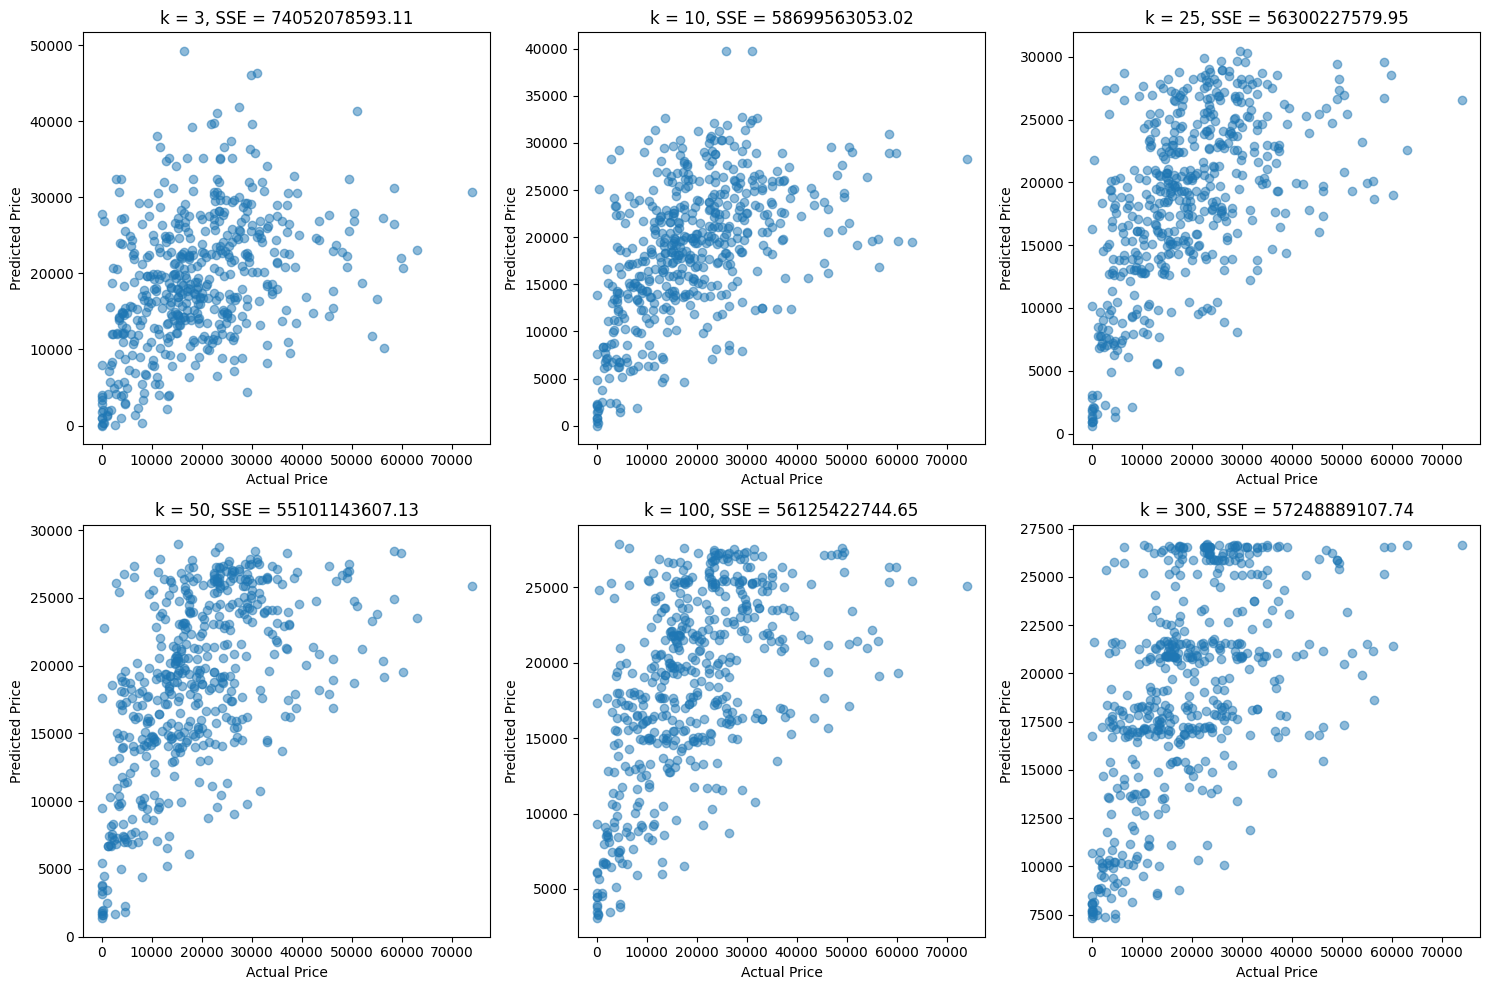

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# KNN regression for different k values and computing Sum of Squared Error
k_values = [3, 10, 25, 50, 100, 300]
sse = {}
predictions = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sse[k] = mean_squared_error(y_test, y_pred) * len(y_test)
    predictions[k] = y_pred

# Create scatter plots for test value vs predicted value for each k
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, predictions[k], alpha=0.5)
    plt.title(f"k = {k}, SSE = {sse[k]:.2f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

In [27]:
# Code to determine the optimal k (based on the lowest SSE)
optimal_k = min(sse, key=sse.get)
optimal_k

50

Underfitting: For very large k, such as 300, the model becomes too generalized. It oversimplifies the relationships in the data, leading to predictions that do not accurately capture the nuances of the actual prices. This is characterized by a very smooth scatterplot line, which deviates from many actual data points.

Overfitting: Conversely, for very small k, like 3, the model becomes too complex and tailored to the training data. It starts capturing noise and fluctuations that are not representative of the overall trend. Scatterplots in this scenario often show a lot of variance around the trend line, indicating the model's poor generalization to new data.

As k gets larger, up to an optimal point, the scatterplot will show a balance between these two extremes, capturing the true trend in the data while avoiding over-complexity or oversimplification. The optimal k is the one that strikes this balance best, typically determined through techniques like cross-validation.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [28]:
import pandas as pd

file_path = './data/airbnb_hw.csv'
airbnb_data = pd.read_csv(file_path)
airbnb_data.head(), airbnb_data.shape

(    Host Id Host Since                                Name Neighbourhood   \
 0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
 1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
 2  39608626        NaN                Sunny Room in Harlem      Manhattan   
 3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
 4       500  6/26/2008            Trendy Times Square Loft      Manhattan   
 
   Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
 0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
 1     Apartment                         NaN     Private room  11206.0   1.0   
 2     Apartment                         NaN     Private room  10032.0   1.0   
 3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
 4     Apartment                        95.0     Private room  10036.0   3.0   
 
    Number of Records  Number Of Reviews Price  

In [29]:
# Cleaning the data
airbnb_data['Price'] = airbnb_data['Price'].str.replace('$','').str.replace(',','').astype(float)
# Dropping rows with NaN values in the specified columns
cleaned_airbnb_data = airbnb_data.dropna(subset=['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'])
cleaned_airbnb_data.head(), cleaned_airbnb_data.shape

(   Host Id Host Since                                 Name Neighbourhood   \
 4      500  6/26/2008             Trendy Times Square Loft      Manhattan   
 5     1039  7/25/2008   Big Greenpoint 1BD w/ Skyline View       Brooklyn   
 6     1783  8/12/2008                         Amazing Also      Manhattan   
 7     2078  8/15/2008  Colorful, quiet, & near the subway!       Brooklyn   
 8     2339  8/20/2008  East Village Cocoon: 2 Bedroom Flat      Manhattan   
 
   Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
 4     Apartment                        95.0     Private room  10036.0   3.0   
 5     Apartment                       100.0  Entire home/apt  11222.0   1.0   
 6     Apartment                       100.0  Entire home/apt  10004.0   1.0   
 7     Apartment                        90.0     Private room  11201.0   1.0   
 8     Apartment                        90.0  Entire home/apt  10009.0   2.0   
 
    Number of Records  Number Of Reviews  Price 

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Selecting relevant columns
data_for_clustering = cleaned_airbnb_data[['Beds', 'Number Of Reviews', 'Review Scores Rating']]



# MaxMin normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_for_clustering)
# Handling NaN values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_normalized_data = imputer.fit_transform(normalized_data)
imputed_normalized_data[:5], np.isnan(imputed_normalized_data).sum()

(array([[0.1875    , 0.1484375 , 0.95      ],
        [0.0625    , 0.01171875, 1.        ],
        [0.0625    , 0.03125   , 1.        ],
        [0.0625    , 0.30859375, 0.925     ],
        [0.125     , 0.3671875 , 0.875     ]]),
 0)

In [31]:
# from sklearn.cluster import KMeans
# import seaborn as sns

# # clusterin -- KMeans for k=6
# kmeans = KMeans(n_clusters=6, random_state=42)
# kmeans.fit(imputed_normalized_data)
# # labelsssssss
# clustered_data = cleaned_airbnb_data.copy()
# clustered_data['Cluster'] = kmeans.labels_
# # seaborn's 
# pairplot = sns.pairplot(clustered_data, vars=['Beds', 'Number Of Reviews', 'Review Scores Rating'], hue='Cluster')
# pairplot.fig.suptitle("KMeans Clustering with k=6", y=1.02) 


In [32]:
# average price for each cluster
cluster_avg_price = clustered_data.groupby('Cluster')['Price'].describe()[['mean']]
cluster_avg_price.sort_values(by='mean', ascending=False)

,mean
Cluster,
0,293.458665
1,152.185916
2,141.654190
3,133.354642
4,133.311475
5,131.552675


In [33]:
# model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for 
# model = model.fit(Z) # Fit the emodel
# Z['cluster'] = model.labels_

# sns.pairplot(data=Z,hue='cluster')

# X['cluster'] = model.labels_
# X.loc[:,['price','cluster'] ].groupby('cluster').describe()

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?